# PRCP-1000-Portuges Bank

- **Details:**
   - **Name:** Aditya Kashinath Rampurkar
   - **Project team's ID:** PTID-CDS-JAN-24-1741
   - **Batch Code:** 14-AUG-23-CDS-WDA16-PUN
   - **Registered Email ID:** adityarampurkar6@gmail.com
   - **Registration Number:** +91 9112497837

In [55]:
# Import important libraries
import pandas as pd
import numpy as np

# Import important libraries visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import libraries for handling categorical data
from sklearn.preprocessing import LabelEncoder

# Library for statistical operations
from scipy.stats import chi2_contingency, ttest_ind
from scipy import stats

# Import libraries to handle scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import important libraries to handle unbalanced dataset
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

# Libraries to split data into Train and Test Data
from sklearn.model_selection import train_test_split

# Import models algorithms
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
import xgboost

# Libraries to evaluate model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data =  pd.read_csv('bank-additional-full.csv', sep=";")

In [3]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Basic checks

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
data.shape

(41188, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

1. No null value

In [8]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
#It give statistical information of the column having categorical data
data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


### Obersvation:

1. Average age in this dataset is 40.02
2. In this dataset minimum age is 17 
3. In this dataset maximum age is 98
4. Mean duration of a call is 258.28sec

In [10]:
data.duplicated().sum()

12

In [11]:
# It will show target variable observations count 
data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [12]:
#ALl the columns name
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [13]:
# Categorical data
categorical_columns = data.select_dtypes(include=['object', 'category'])

print("\n""Names of columns having categorical value:\n", list(categorical_columns))


Names of columns having categorical value:
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [14]:
# Numerical data
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

print("\n""Names of columns having numerical value:\n", list(numerical_columns))


Names of columns having numerical value:
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


# Univariant analysis

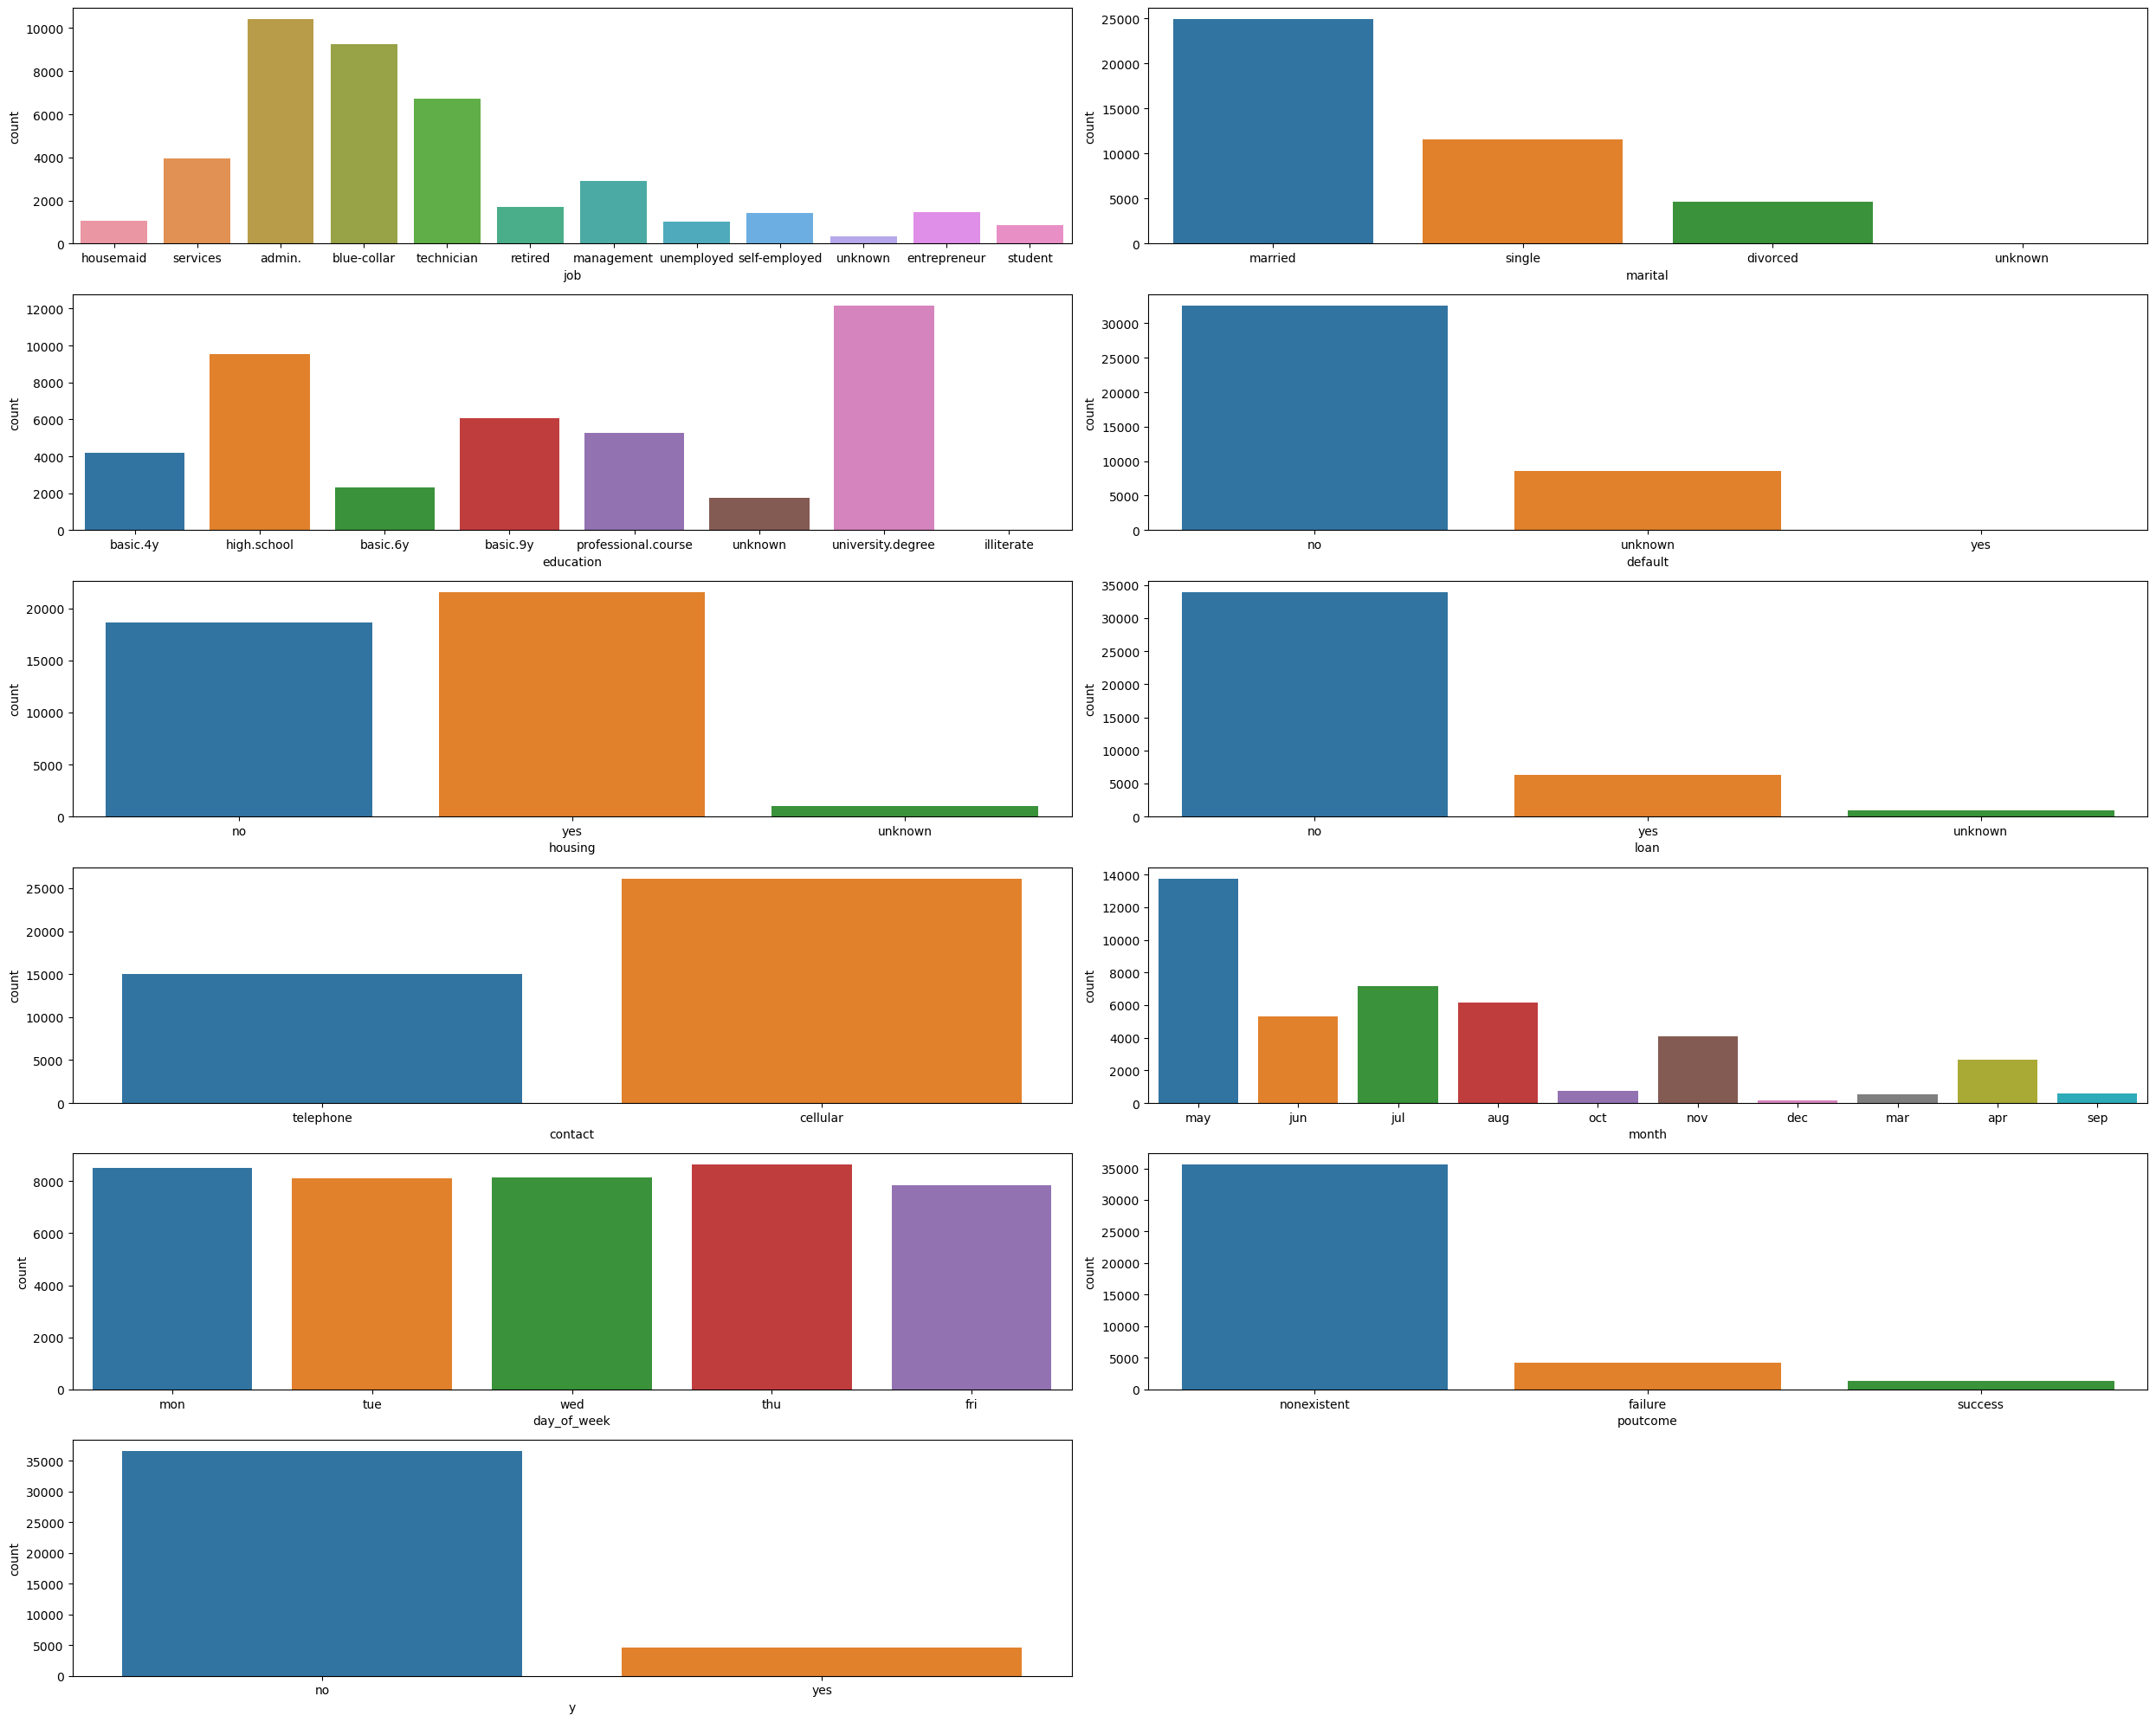

In [15]:
# Plotting how every  categorical feature correlate with the "target"
plt.figure(figsize=(25,20), facecolor='white')#canvas size
plotnumber = 1#count variable

for column in categorical_columns:#for loop to acess columns form data1
    if plotnumber<=11 :#checking whether count variable is less than 16 or not
        ax = plt.subplot(6,2,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.countplot(x=categorical_columns[column].dropna(axis=0)) 
        plt.xlabel(column,fontsize=10)#assigning name to x-axis and increasing it's font 

    plotnumber+=1#increasing counter
plt.tight_layout()

### Obeservation

1. Most of call were made to admin,followed by blue-collar and technican
2. Most of people are married,followed by  single and divorace
3. Most of call where made university.degree, followed by high.school and basic.9y
4. Most of the people where having house
5. Most of the people are not having lone
6. Most of the people are having cellur phone
7. Most of call where made in may,july and august
8. Call ratio is same every day

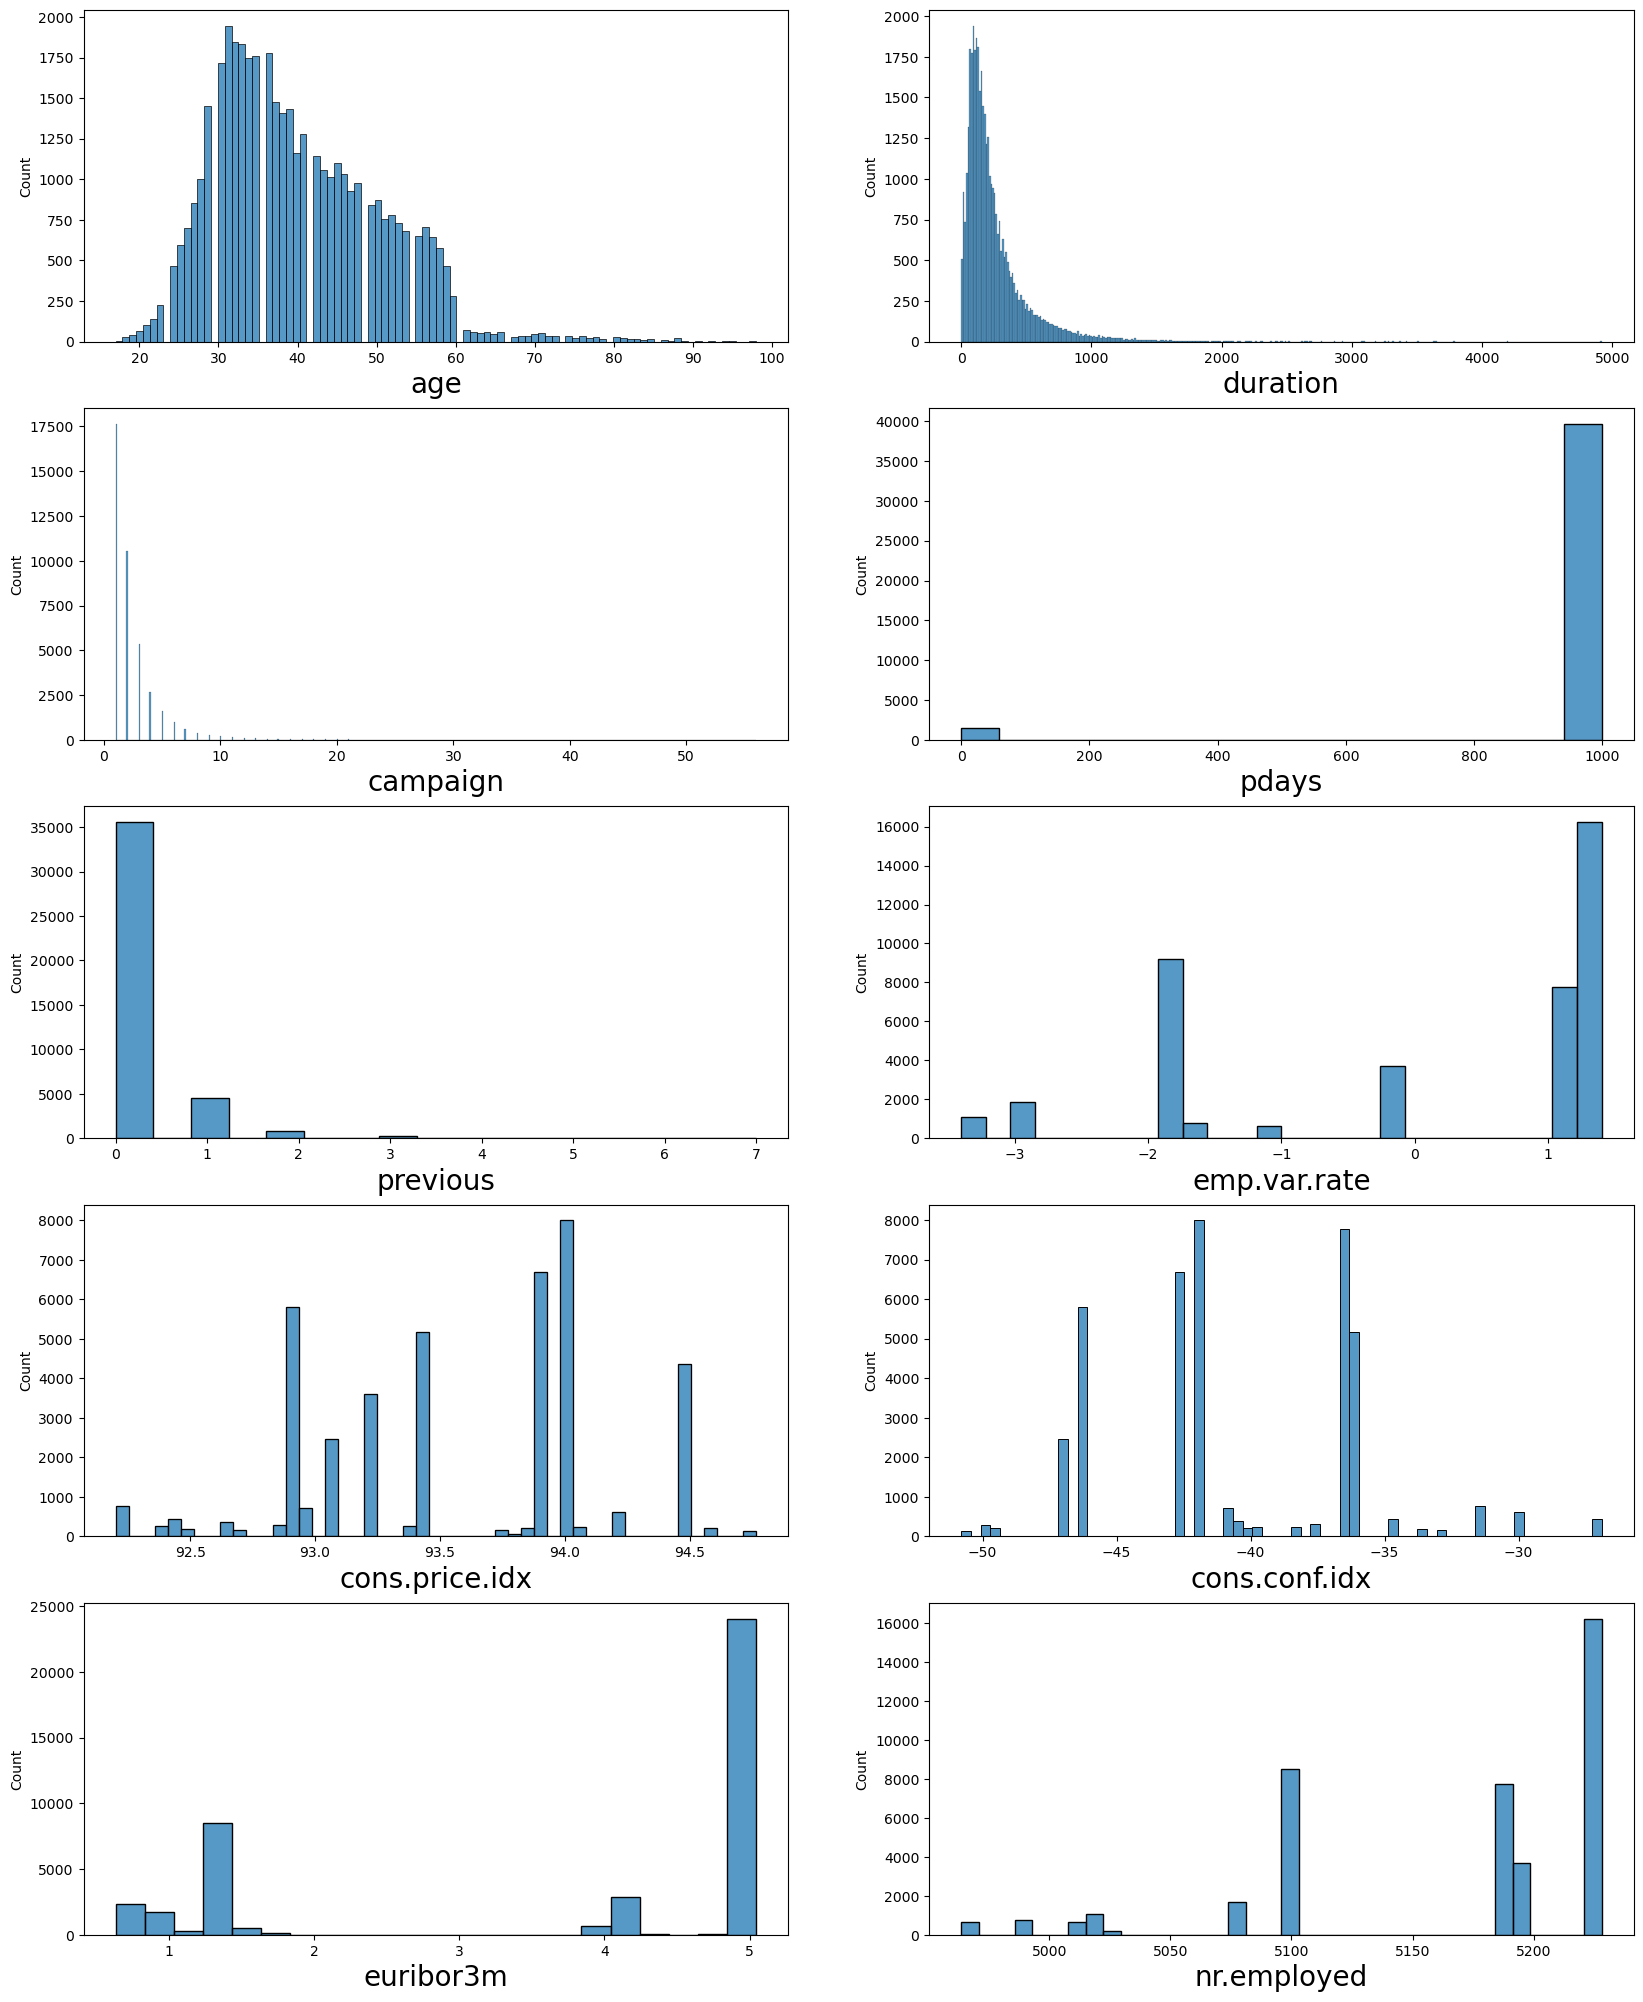

In [16]:
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 

for column in numerical_columns: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=10 :     # as there are 10 columns in the data
        ax = plt.subplot(5,2,plotnumber)# plotting 10 graphs (5-rows,2-columns) ,plotnumber is for count  
        sns.histplot(x=numerical_columns[column]) 
        plt.xlabel(column,fontsize=20) #assigning name to x-axis and "name" font size is 20
    plotnumber+=1 # increment of plotnumber 
plt.show()# to show graph

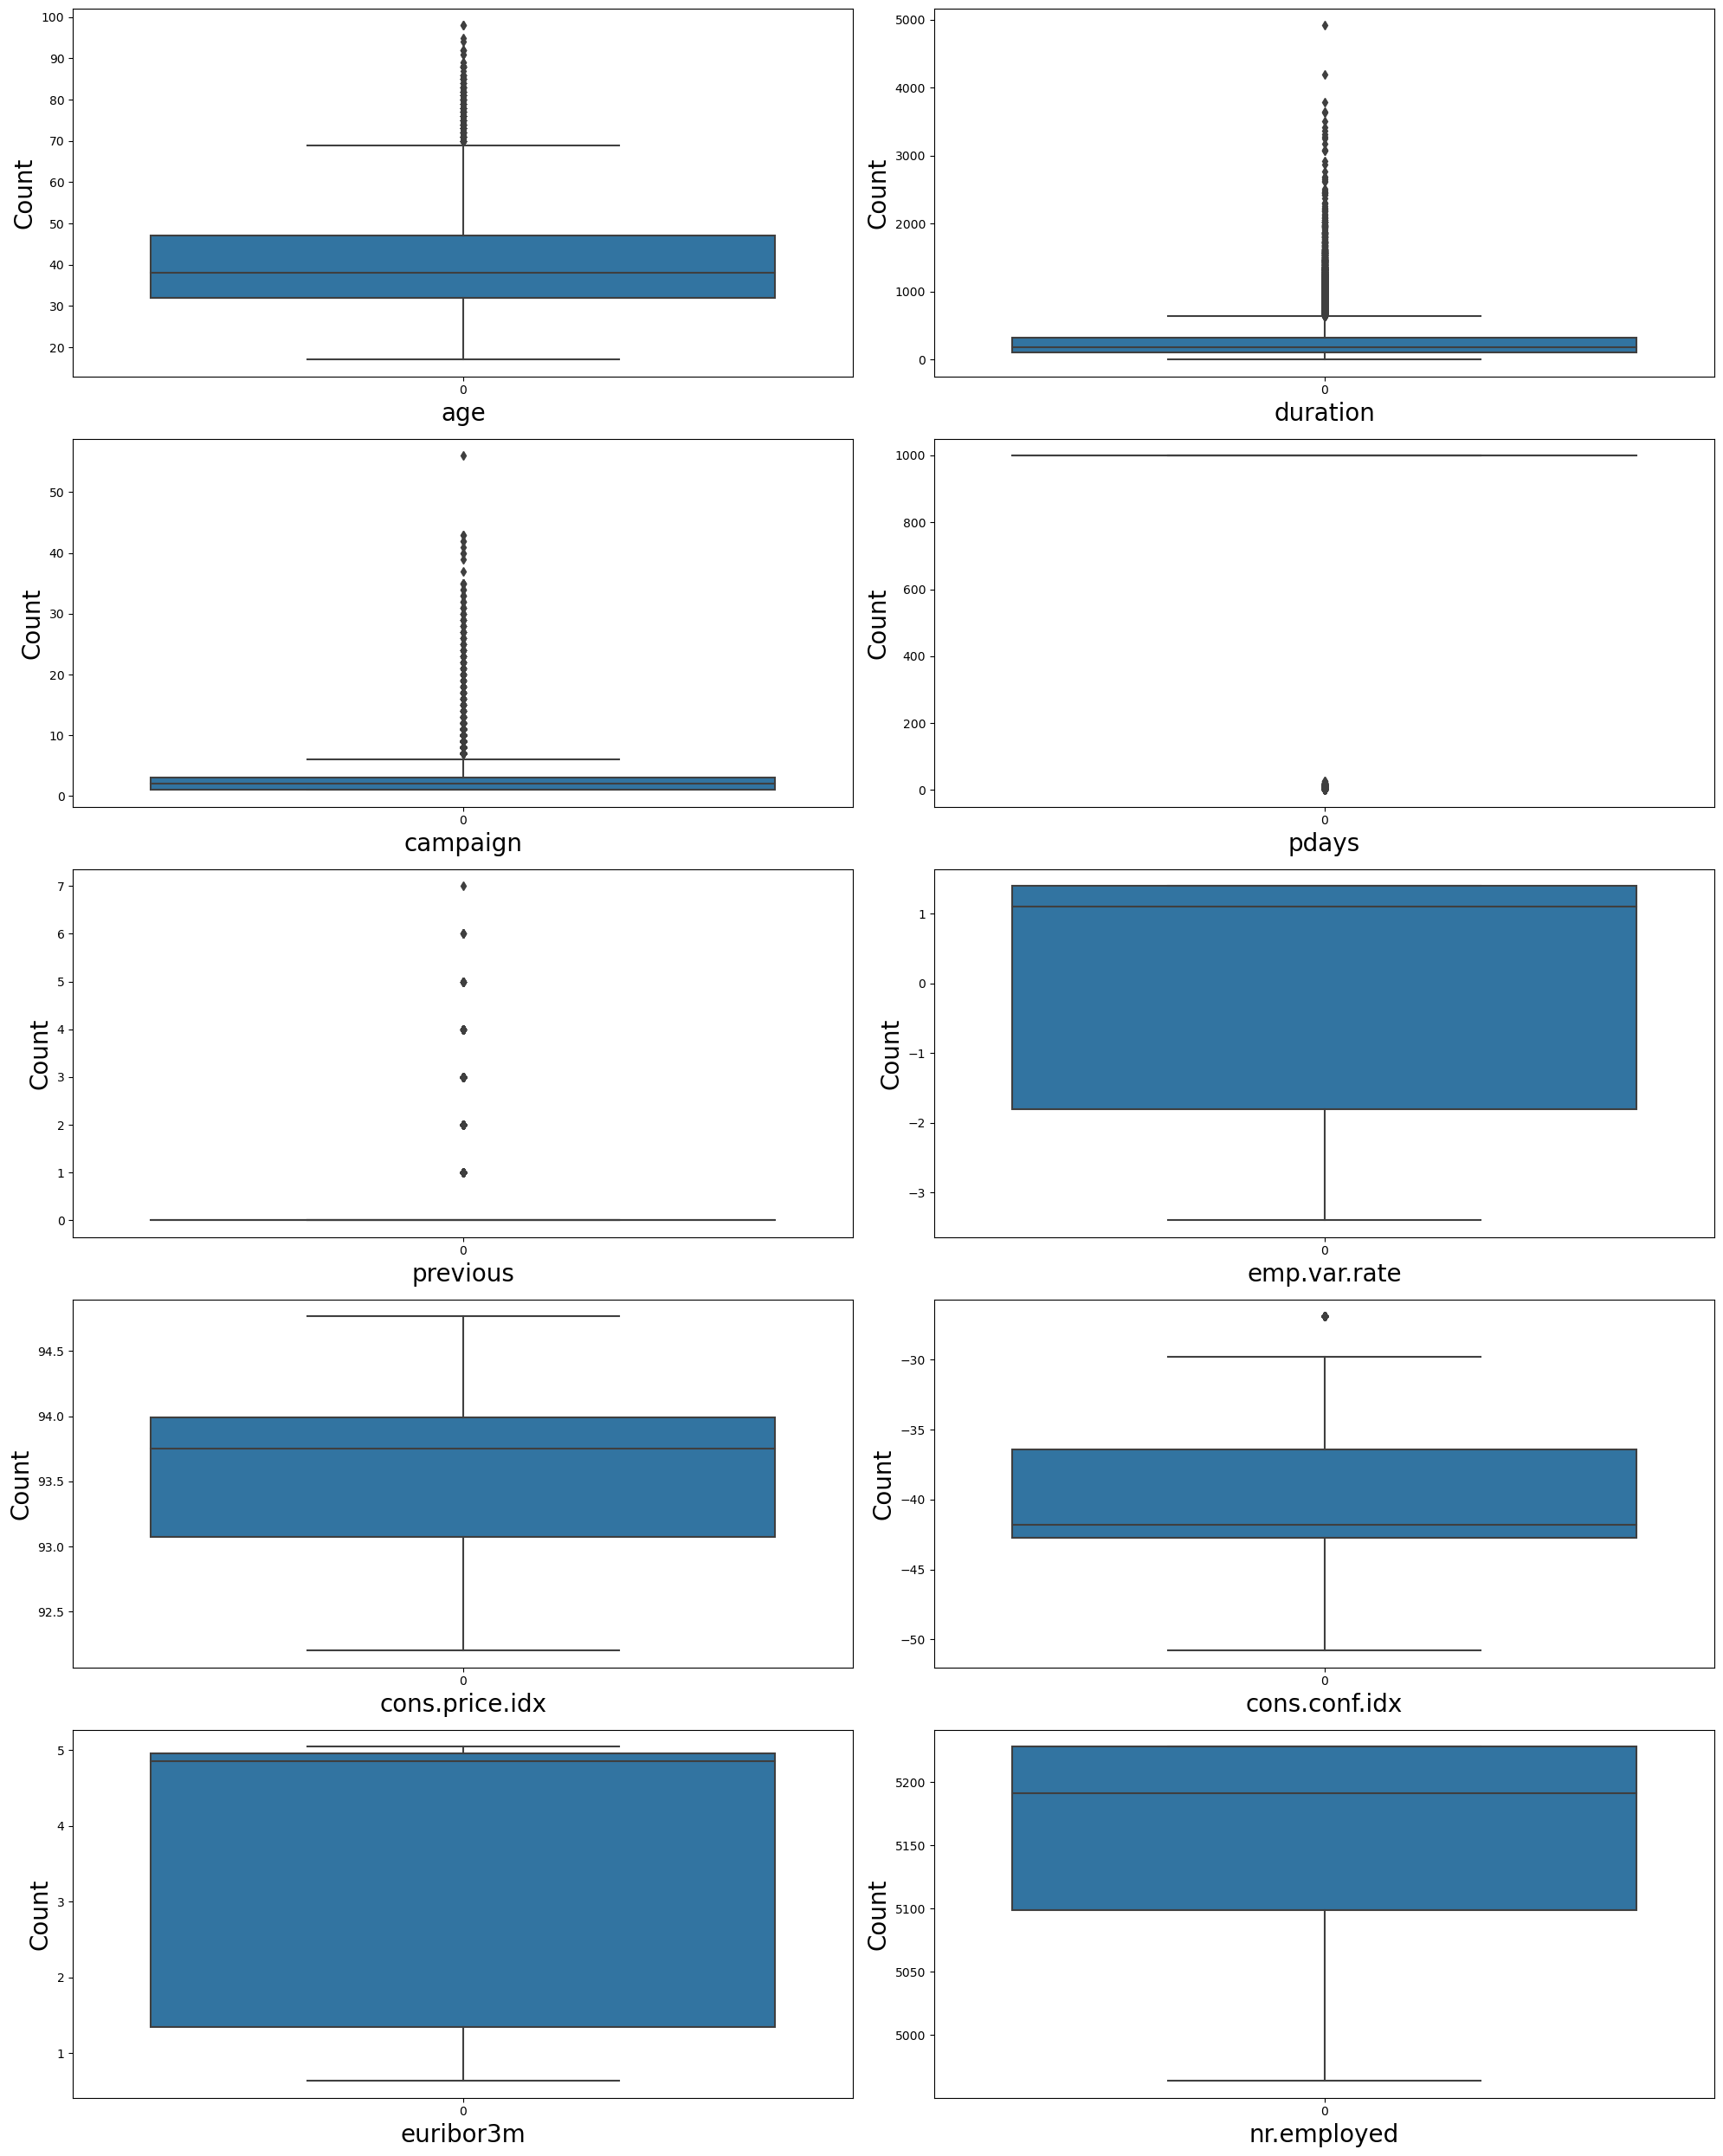

In [17]:
#Plotting of outlier for checking of outlier

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in numerical_columns:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(numerical_columns[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Observation

#### Outlier found in column:
    1. Age 
    2. Duration
    3. Campaign
    4. pdays
    5. previous
    6. cons.conf.idx

## Bivariant analysis

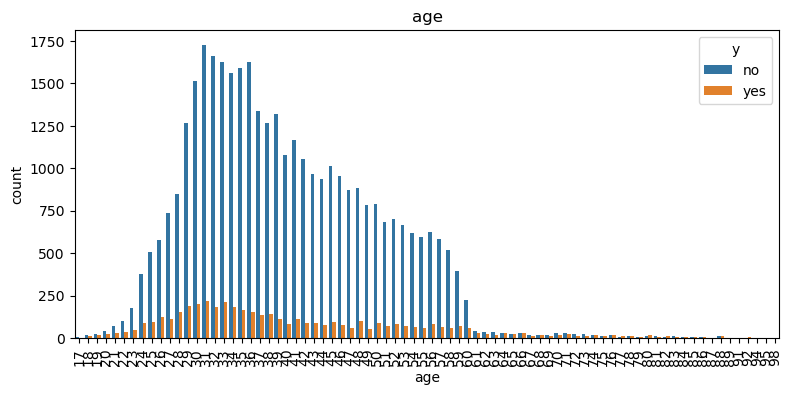

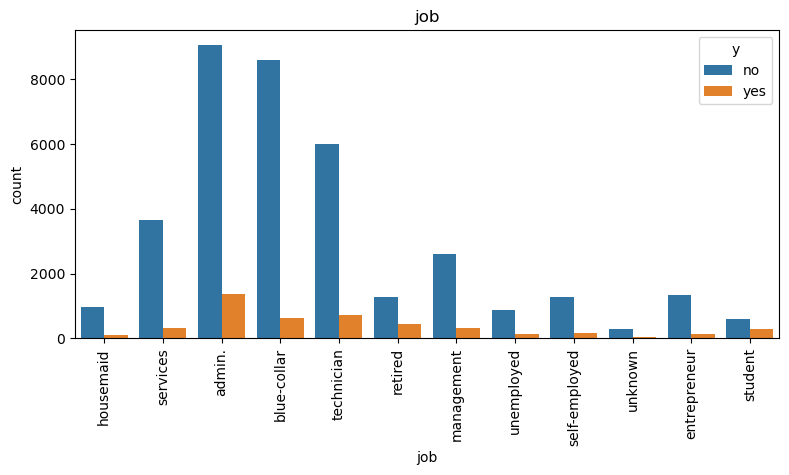

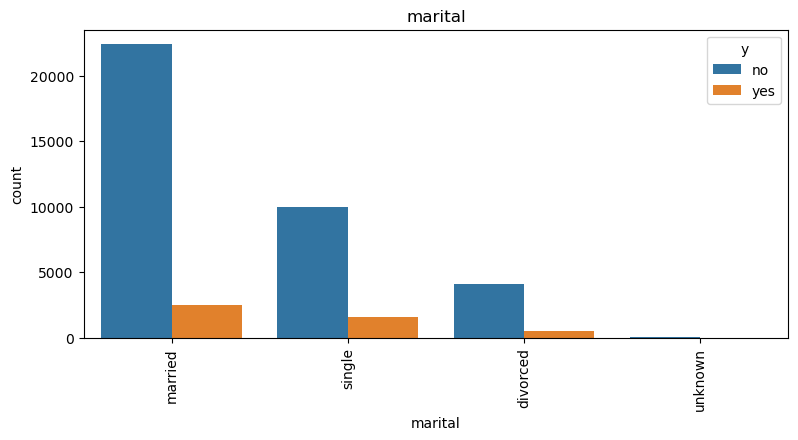

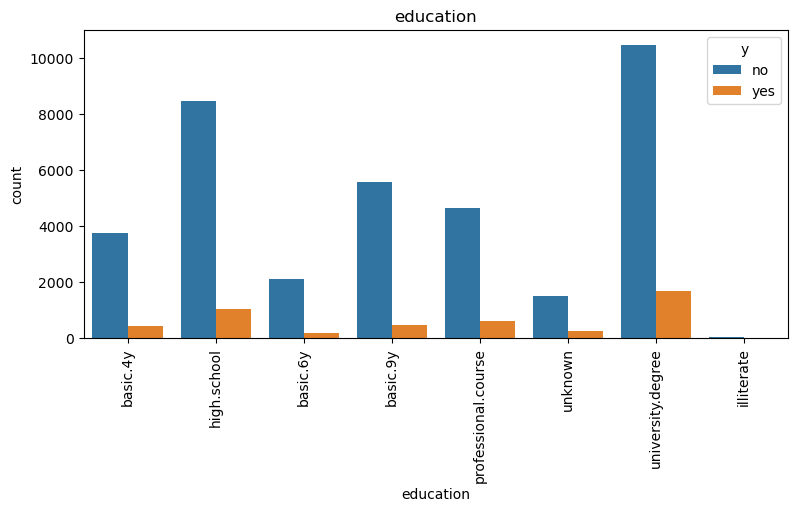

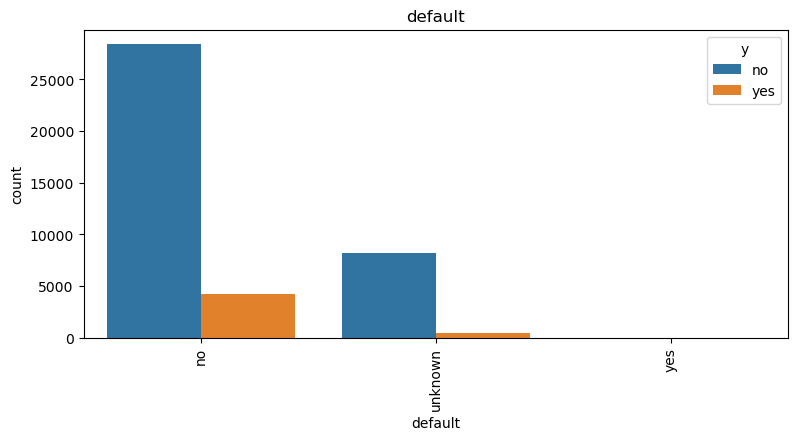

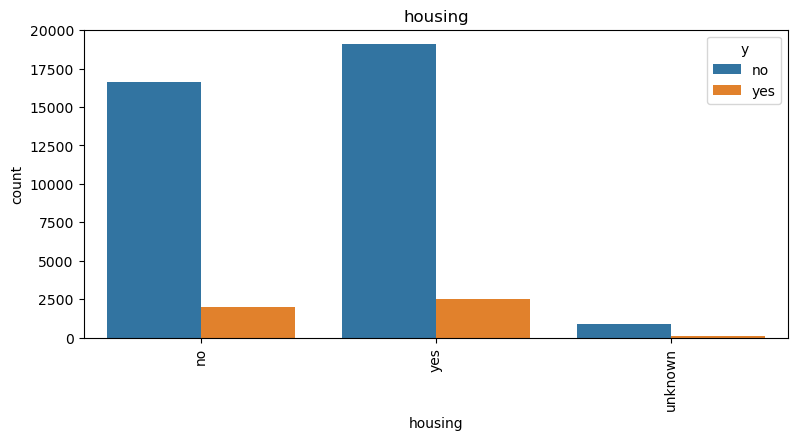

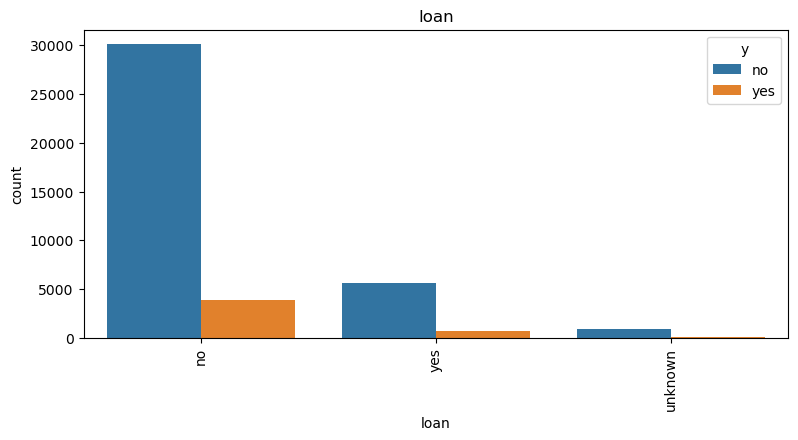

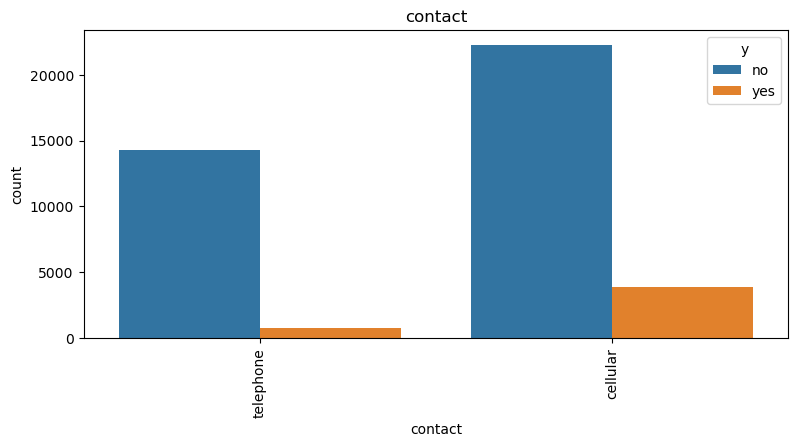

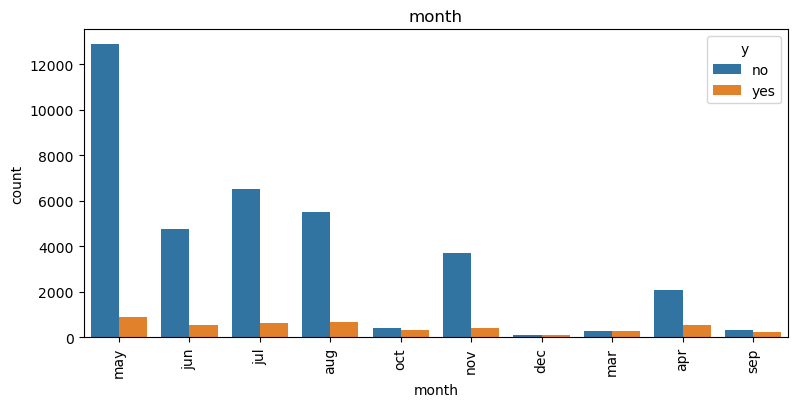

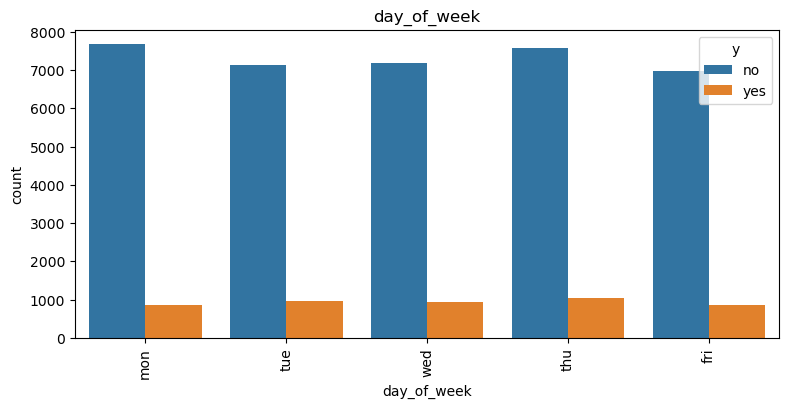

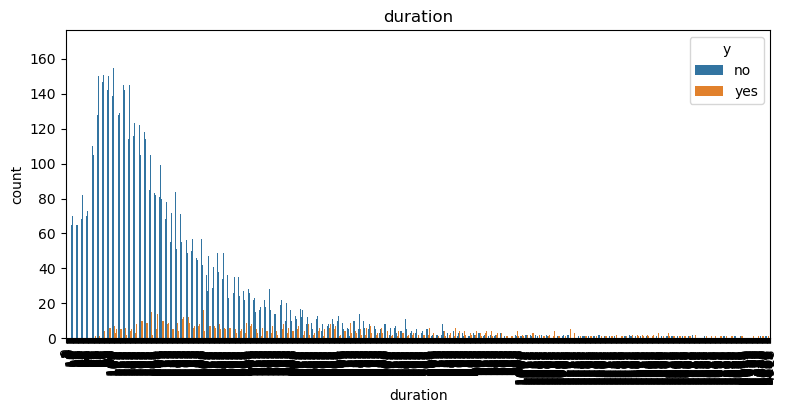

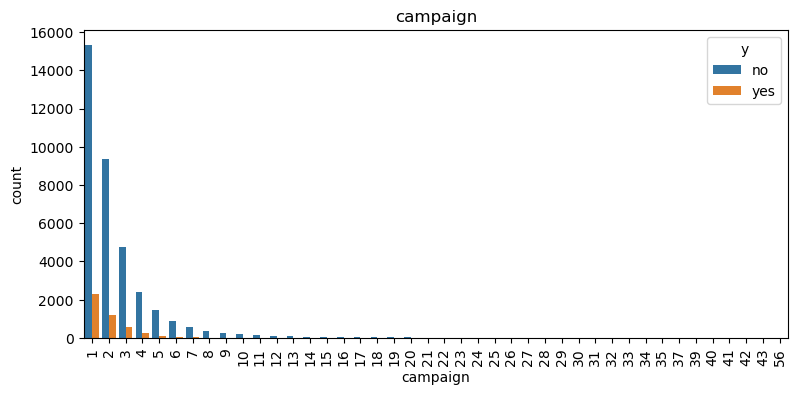

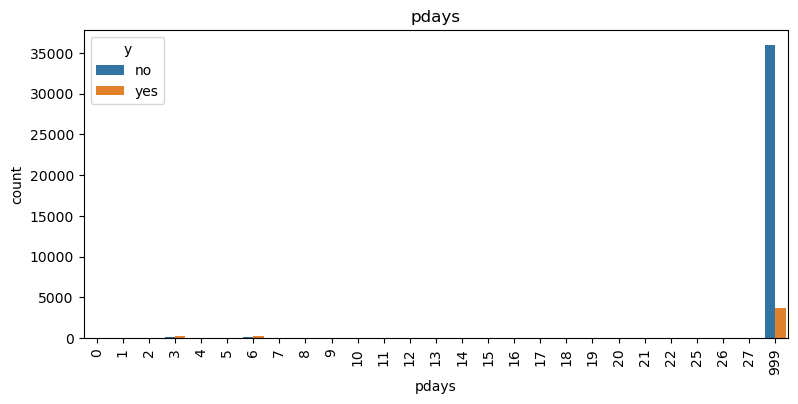

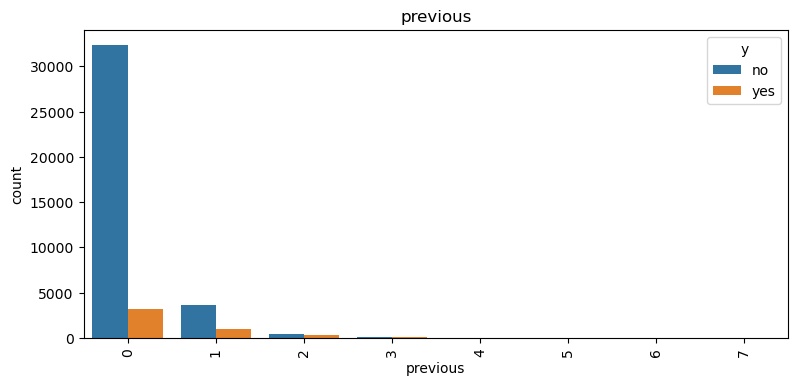

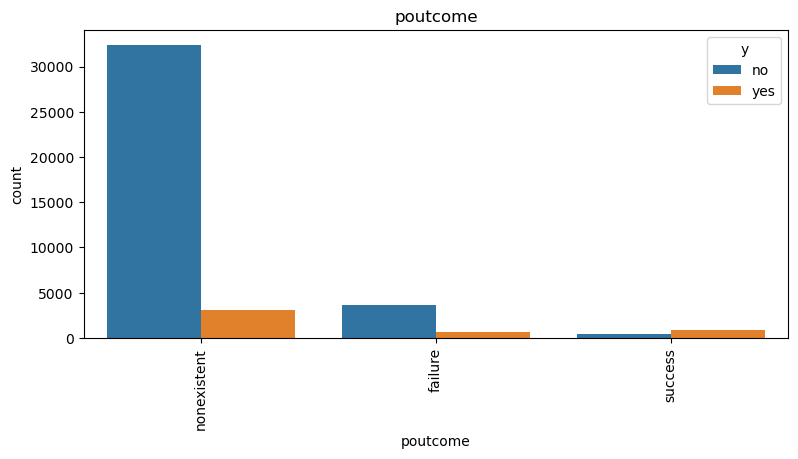

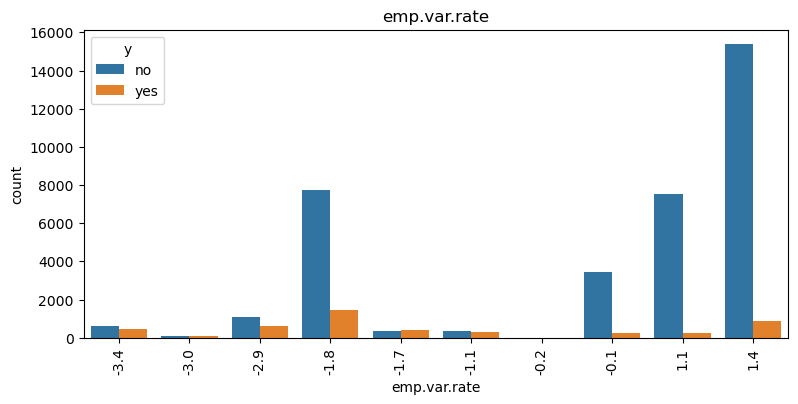

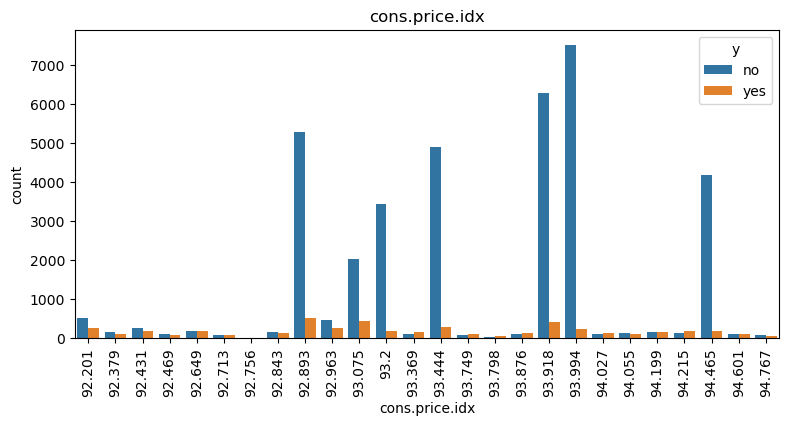

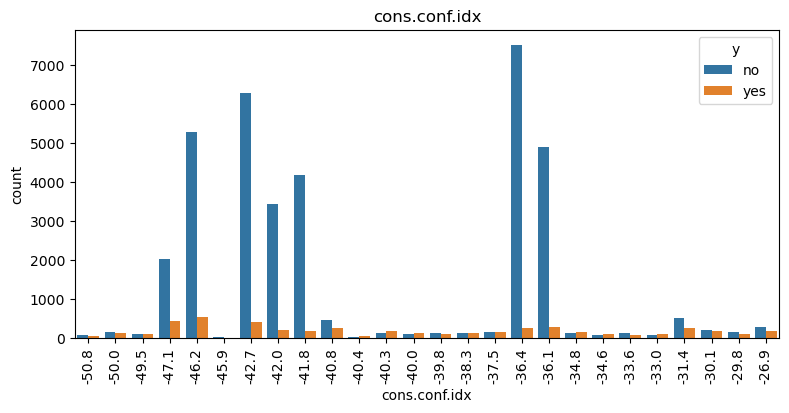

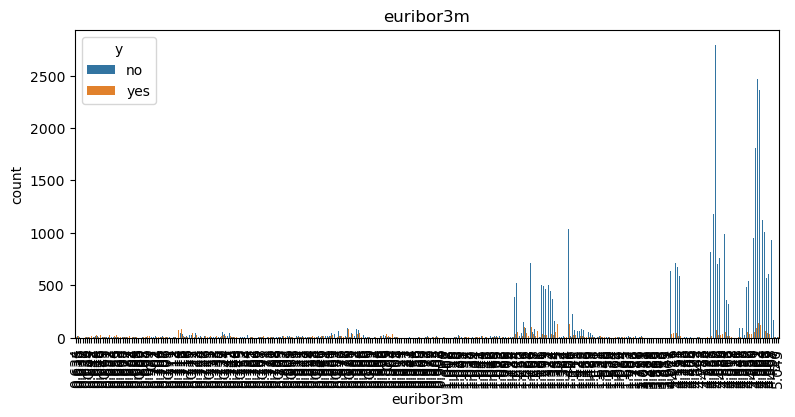

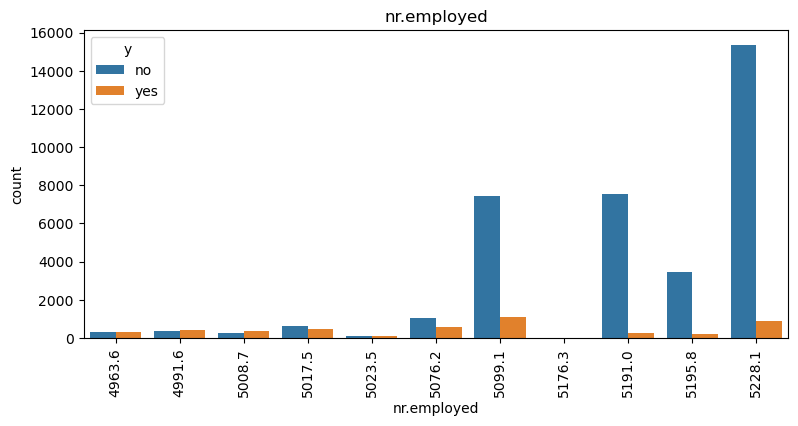

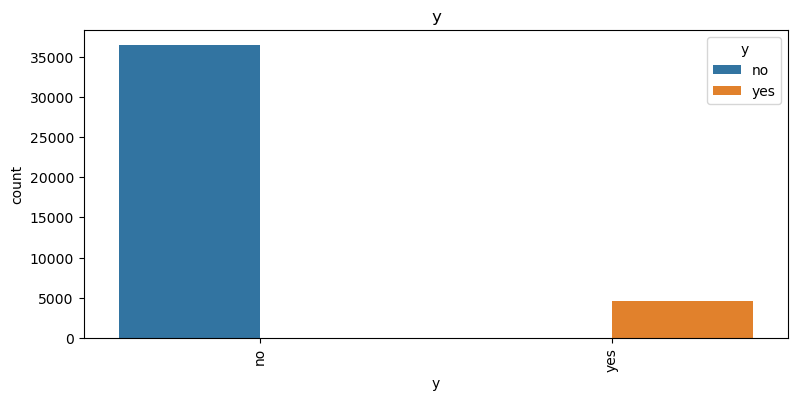

In [18]:
# Plotting how every  categorical feature correlate with the "target"

for column in data:
    plt.figure(figsize=(20, 4))
    plt.subplot(121)
    sns.countplot(x=data[column], hue=data['y'], data=data)
    plt.title(column)
    plt.xticks(rotation=90)
    plt.show()

In [19]:
categorical_columns = data.select_dtypes(include="object").columns

for cat_col in data.columns:
    cross_tab = pd.crosstab(data[cat_col], data['y'], margins=True, margins_name='Total')
    print(f"\n\nCross-tabulation for {cat_col}:\n")
    print(cross_tab.to_markdown())
    print("\n" + "*" * 100 + "\n")



Cross-tabulation for age:

| age   |    no |   yes |   Total |
|:------|------:|------:|--------:|
| 17    |     3 |     2 |       5 |
| 18    |    16 |    12 |      28 |
| 19    |    22 |    20 |      42 |
| 20    |    42 |    23 |      65 |
| 21    |    73 |    29 |     102 |
| 22    |   101 |    36 |     137 |
| 23    |   178 |    48 |     226 |
| 24    |   377 |    86 |     463 |
| 25    |   505 |    93 |     598 |
| 26    |   576 |   122 |     698 |
| 27    |   737 |   114 |     851 |
| 28    |   850 |   151 |    1001 |
| 29    |  1267 |   186 |    1453 |
| 30    |  1512 |   202 |    1714 |
| 31    |  1727 |   220 |    1947 |
| 32    |  1662 |   184 |    1846 |
| 33    |  1623 |   210 |    1833 |
| 34    |  1561 |   184 |    1745 |
| 35    |  1592 |   167 |    1759 |
| 36    |  1626 |   154 |    1780 |
| 37    |  1338 |   137 |    1475 |
| 38    |  1264 |   143 |    1407 |
| 39    |  1318 |   114 |    1432 |
| 40    |  1077 |    84 |    1161 |
| 41    |  1165 |   113 |    1278 |



Cross-tabulation for cons.conf.idx:

| cons.conf.idx   |    no |   yes |   Total |
|:----------------|------:|------:|--------:|
| -50.8           |    70 |    58 |     128 |
| -50.0           |   156 |   126 |     282 |
| -49.5           |   111 |    93 |     204 |
| -47.1           |  2016 |   442 |    2458 |
| -46.2           |  5270 |   524 |    5794 |
| -45.9           |     9 |     1 |      10 |
| -42.7           |  6278 |   407 |    6685 |
| -42.0           |  3426 |   190 |    3616 |
| -41.8           |  4186 |   188 |    4374 |
| -40.8           |   451 |   264 |     715 |
| -40.4           |    25 |    42 |      67 |
| -40.3           |   135 |   176 |     311 |
| -40.0           |    90 |   122 |     212 |
| -39.8           |   122 |   107 |     229 |
| -38.3           |   113 |   120 |     233 |
| -37.5           |   153 |   150 |     303 |
| -36.4           |  7523 |   240 |    7763 |
| -36.1           |  4904 |   271 |    5175 |
| -34.8           |   114 |   150 |     2

## Observation

1. Most of the people who agree to the term deposit are in the age range of 25 to 42.
2. The majority of individuals agreeing to the term deposit are employed in administrative, blue-collar, and technician roles.
3. Most of the people who agree to the term deposit are either married or single.
4. The agreement to the term deposit is highest among individuals with educational backgrounds such as university degree, high school, and professional course.
5. No meaningful observation can be derived from the 'default' column.
6. The majority of people agreeing to the term deposit do not have loans.
7. The agreement to the term deposit is higher among individuals who use cellular phones.
8. The peak agreement to the term deposit is observed in the months of May, July, and August.
9. From the campaign cross-table, it is evident that as the number of calls increases, the percentage of agreements decreases.
10. Clients contacted in the first 15 days are more likely to opt for a term deposit.
11. Approximately 91% of clients were not contacted in the previous campaign.
12. Approximately 86% of clients were not contacted before this campaign.

In [20]:
 ### Person which were not prevoiusly contacted  and still opt to yes
    
df = data.loc[(data['pdays']==999) & (data['y']=='yes')]
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41172,31,admin.,single,university.degree,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,yes
41173,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Multivarient analysis

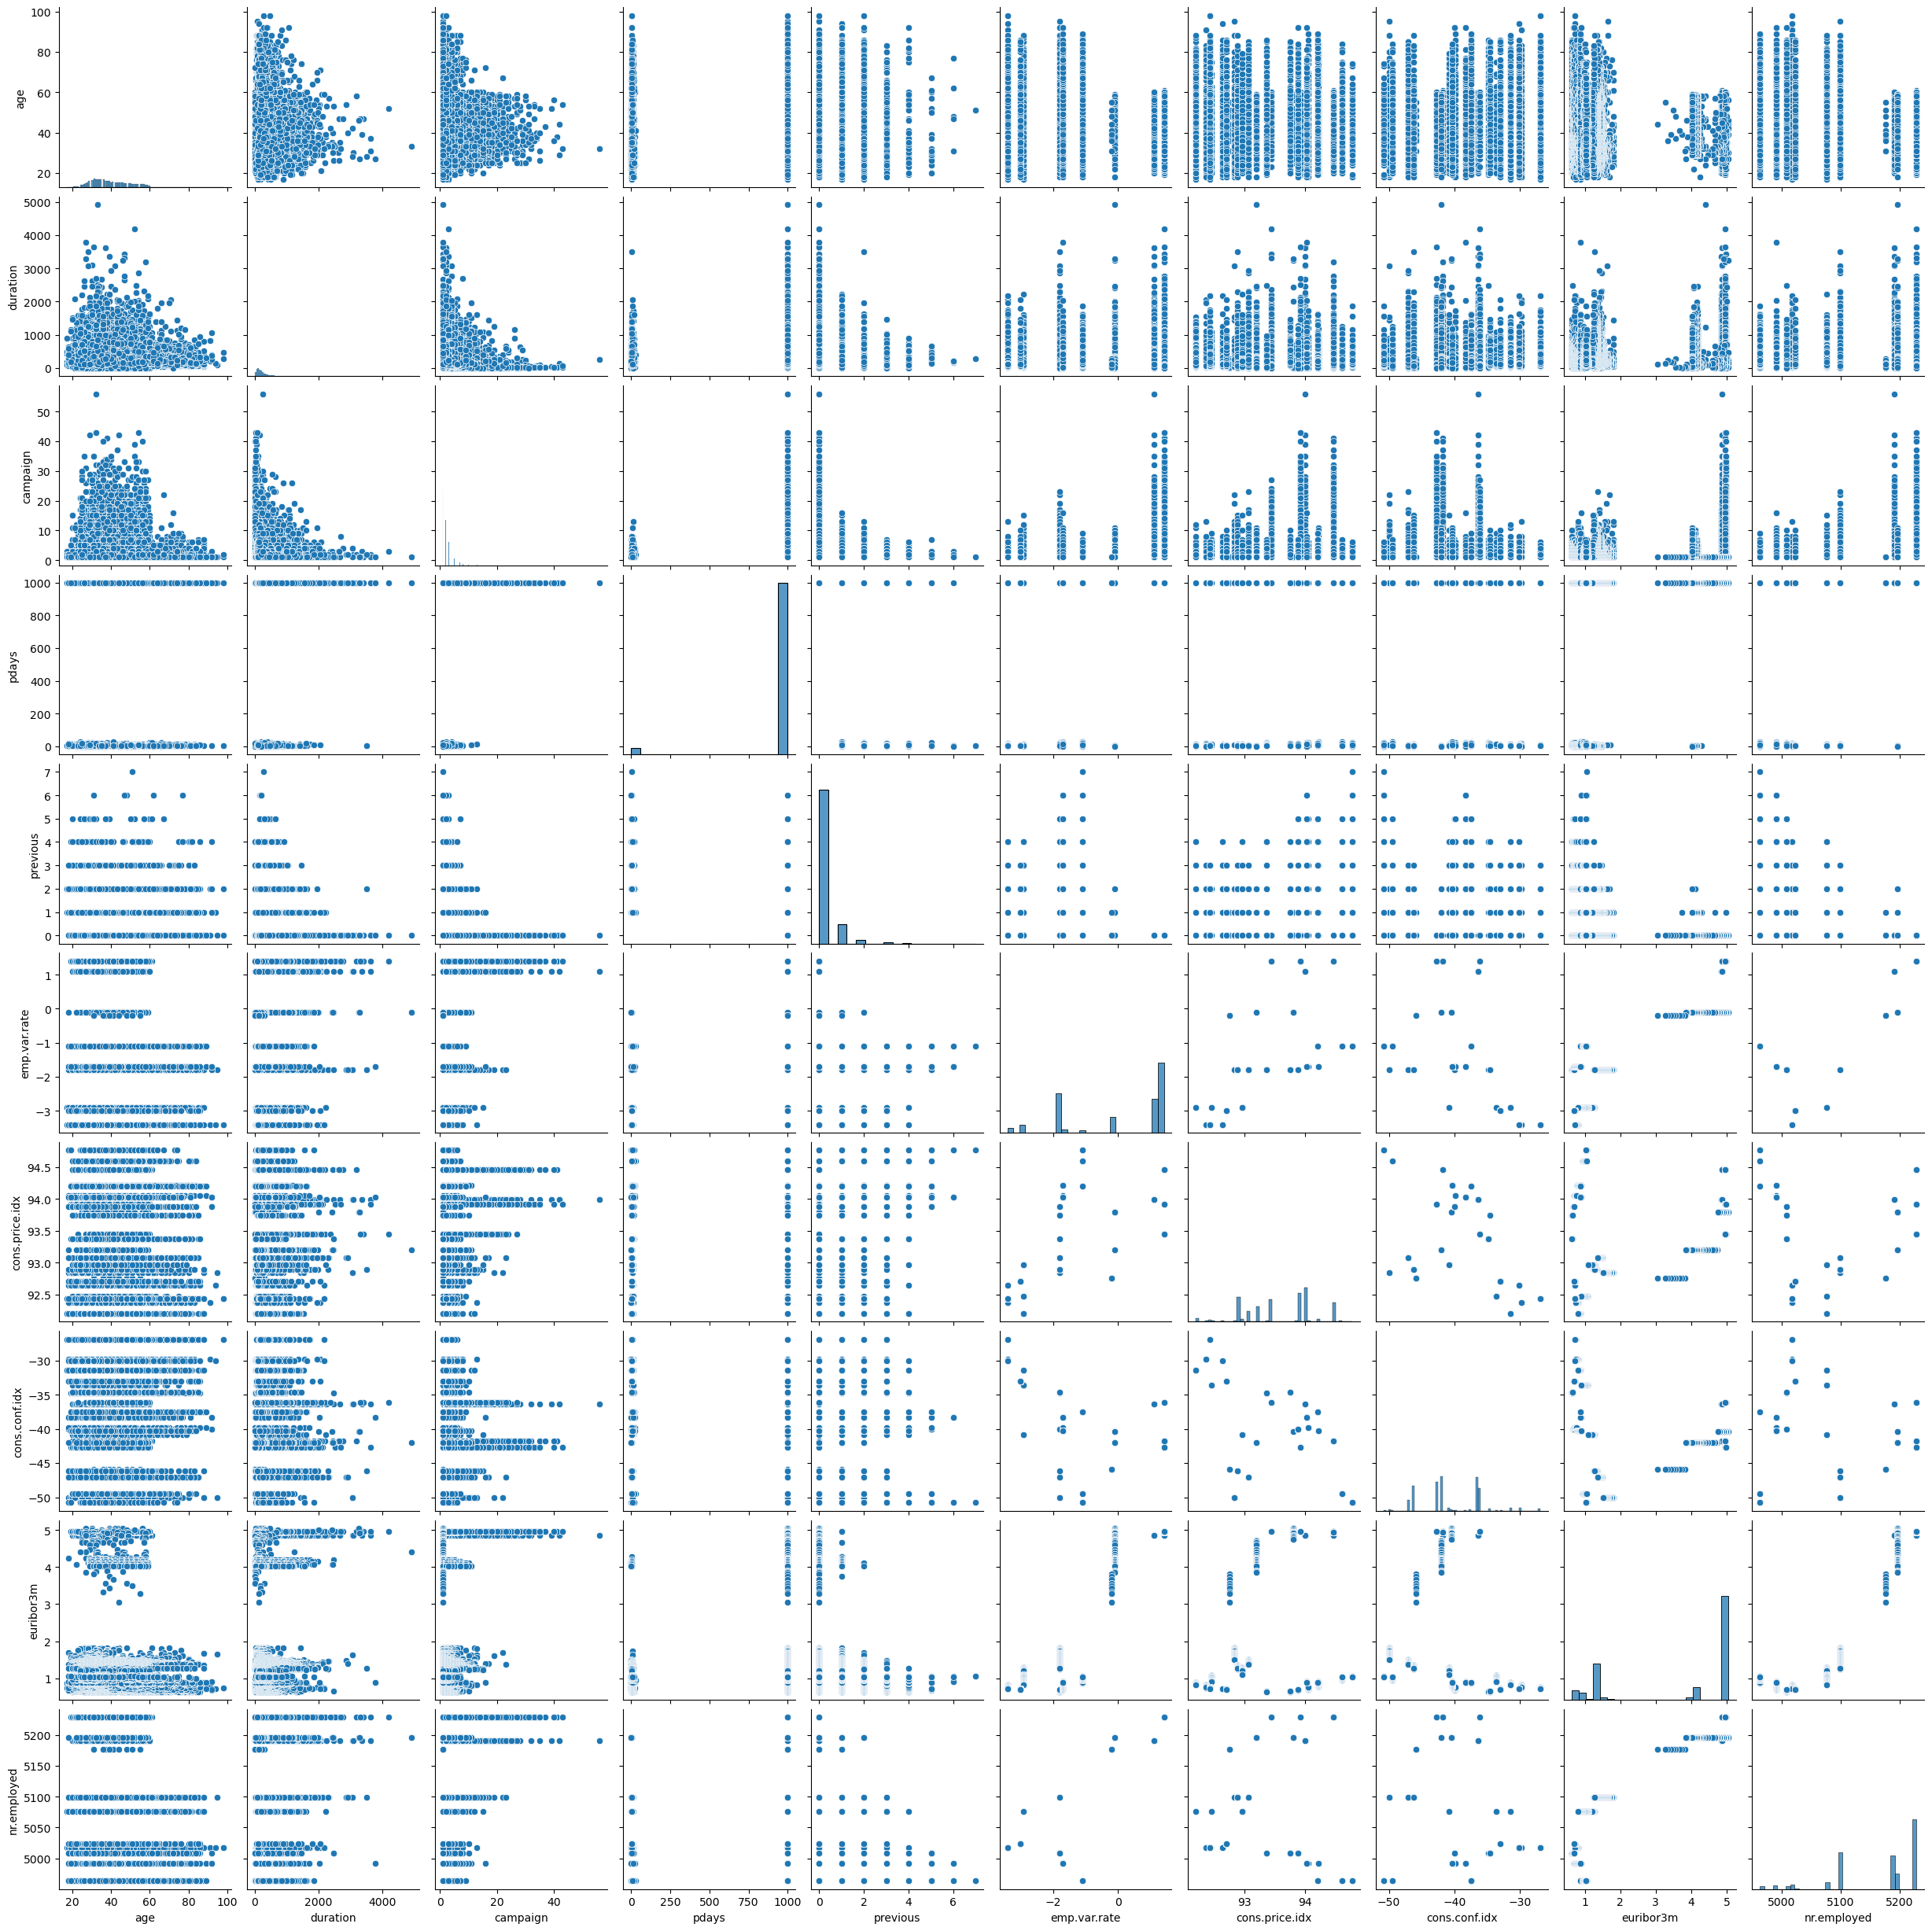

In [21]:
sns.pairplot(data)
plt.show()

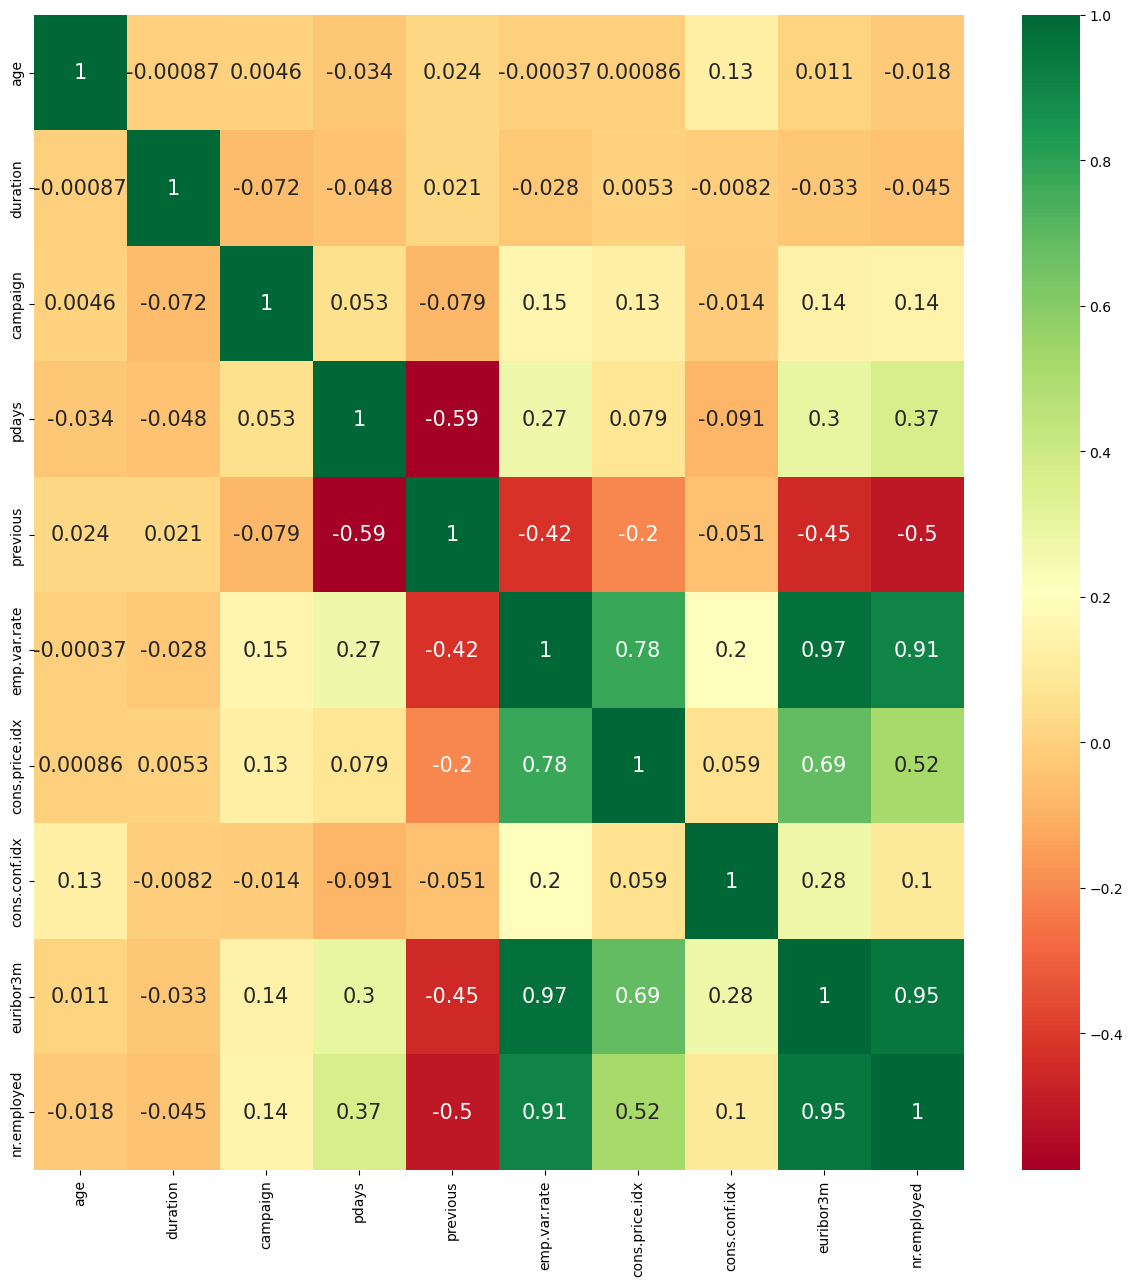

In [22]:
plt.figure(figsize=(15, 15))
sns.heatmap(numerical_columns.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
plt.show()

In [23]:
data.drop(['euribor3m','nr.employed'], axis="columns", inplace=True)

In [24]:
# 'y' is our target variable
target_variable = 'y'

# Select only categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Create a list to store results
chi2_results = []

# Perform Chi-squared test for each categorical column with the target variable
for col in categorical_columns:
    if col != target_variable:
        contingency_table = pd.crosstab(data[col], data[target_variable])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi2_results.append(
            {
            'Column': col,
            'Chi-squared': '{:.2f}'.format(chi2),
            'P-value': '{:.4f}'.format(p)
            }
        )

# Display the results
results_df = pd.DataFrame(chi2_results)
print(results_df)

        Column Chi-squared P-value
0          job      961.24  0.0000
1      marital      122.66  0.0000
2    education      193.11  0.0000
3      default      406.58  0.0000
4      housing        5.68  0.0583
5         loan        1.09  0.5787
6      contact      862.32  0.0000
7        month     3101.15  0.0000
8  day_of_week       26.14  0.0000
9     poutcome     4230.52  0.0000


In [25]:
#  Smaller p-values indicating stronger evidence against the null hypothesis of independence.

In [26]:
target_variable = 'y'
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

t_test_results = []

for num_col in numerical_columns:
    group_yes = data[data[target_variable] == 'yes'][num_col]
    group_no = data[data[target_variable] == 'no'][num_col]

    # Perform a t-test
    t_statistic, p_value = ttest_ind(group_yes, group_no, equal_var=False)  # Assuming unequal variance

    t_test_results.append({
        'Variable': num_col,
        'T-statistic': t_statistic,
        'P-value': '{:.2f}'.format(p_value)  # Format p-value to display only 2 decimal places
    })

# Display the results
results_df = pd.DataFrame(t_test_results)
print(results_df)

         Variable  T-statistic P-value
0             age     4.779543    0.00
1        duration    55.500166    0.00
2        campaign   -20.249378    0.00
3           pdays   -32.250869    0.00
4        previous    28.125534    0.00
5    emp.var.rate   -59.136663    0.00
6  cons.price.idx   -24.082467    0.00
7   cons.conf.idx     8.636458    0.00


In [27]:
# The farther the t-statistic is from zero, 
# the more evidence you have against the null hypothesis.

# If the t-statistic is positive, it suggests that 
# the mean of the first group (specified first in the t-test) is higher.

# If the t-statistic is negative, 
# it suggests that the mean of the second group is higher.

# A smaller p-value (typically below a significance level, e.g., 0.05) 
# suggests stronger evidence against the null hypothesis.

## Preprocessing

In [28]:
data.drop_duplicates(inplace = True)

In [29]:
data.drop('duration',axis = 1,inplace = True)

In [30]:
data.replace('unknown',np.nan,inplace = True)

In [31]:
# Replace null value

categorical_columns = data.select_dtypes(include=['object']).columns

# Replace missing values in categorical columns with the mode
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.fillna(x.mode().iloc[0]))

data = pd.DataFrame(data)

In [32]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
y                 0
dtype: int64

In [33]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,yes


In [34]:
## using IQR to remove the outliers
IQR_age = stats.iqr(data.age, interpolation = 'midpoint')

Q1_age = data.age.quantile(0.25)

Q3_age = data.age.quantile(0.75)

min_limit_age = Q1_age - 1.5*IQR_age

max_limit_age = Q3_age + 1.5*IQR_age

data.loc[(data.age > max_limit_age) | (data.age < min_limit_age), 'age']=np.median(data.age)

In [35]:
# Changing categorical data to Numeric data using LabelEncoder

categorical_columns = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Display the Data after label encoding
print(data)

       age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0        0        0     0        1      6   
1       57    7        1          3        0        0     0        1      6   
2       37    7        1          3        0        1     0        1      6   
3       40    0        1          1        0        0     0        1      6   
4       56    7        1          3        0        0     1        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   38    5        1          5        0        1     0        0      7   
41184   46    1        1          5        0        0     0        0      7   
41185   56    5        1          6        0        1     0        0      7   
41186   44    9        1          5        0        0     0        0      7   
41187   38    5        1          5        0        1     0        0      7   

       day_of_week  campaign  pdays  previous  pout

In [36]:
# Checking data type of datatypes after label encoding
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41175 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41175 non-null  int64  
 1   job             41175 non-null  int32  
 2   marital         41175 non-null  int32  
 3   education       41175 non-null  int32  
 4   default         41175 non-null  int32  
 5   housing         41175 non-null  int32  
 6   loan            41175 non-null  int32  
 7   contact         41175 non-null  int32  
 8   month           41175 non-null  int32  
 9   day_of_week     41175 non-null  int32  
 10  campaign        41175 non-null  int64  
 11  pdays           41175 non-null  int64  
 12  previous        41175 non-null  int64  
 13  poutcome        41175 non-null  int32  
 14  emp.var.rate    41175 non-null  float64
 15  cons.price.idx  41175 non-null  float64
 16  cons.conf.idx   41175 non-null  float64
 17  y               41175 non-null 

In [37]:
# Checking complete dataset after label encoding
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,0
1,57,7,1,3,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,0
2,37,7,1,3,0,1,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,0
4,56,7,1,3,0,0,1,1,6,1,1,999,0,1,1.1,93.994,-36.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,38,5,1,5,0,1,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,0
41185,56,5,1,6,0,1,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,0
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1


In [38]:
# Columns Needed Scaling
scaling = data.iloc[:, :-1]

In [39]:
scaling

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4
1,57,7,1,3,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4
2,37,7,1,3,0,1,0,1,6,1,1,999,0,1,1.1,93.994,-36.4
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4
4,56,7,1,3,0,0,1,1,6,1,1,999,0,1,1.1,93.994,-36.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,38,5,1,5,0,1,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8
41185,56,5,1,6,0,1,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8


In [40]:
# Standard Scaler

scaler = StandardScaler()

# Fit the scaler to the data and transform the data
data1 = scaler.fit_transform(scaling)

banks = pd.DataFrame(data1, columns=['age', 'job', 'marital', 'education', 
                                  'default', 'housing', 'loan',
                                  'contact', 'month', 'day_of_week', 
                                  'campaign', 'pdays',
                                  'previous', 'poutcome',
                                  'emp.var.rate', 'cons.price.idx',
                                  'cons.conf.idx'])
banks

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
0,1.706446,-0.179205,-0.279767,-1.780149,-0.008536,-1.100929,-0.422951,1.318149,0.762519,-0.718754,-0.565972,0.195446,-0.349556,0.192654,0.648075,0.722603,0.886544
1,1.810379,0.947709,-0.279767,-0.338710,-0.008536,-1.100929,-0.422951,1.318149,0.762519,-0.718754,-0.565972,0.195446,-0.349556,0.192654,0.648075,0.722603,0.886544
2,-0.268282,0.947709,-0.279767,-0.338710,-0.008536,0.908324,-0.422951,1.318149,0.762519,-0.718754,-0.565972,0.195446,-0.349556,0.192654,0.648075,0.722603,0.886544
3,0.043517,-1.024390,-0.279767,-1.299670,-0.008536,-1.100929,-0.422951,1.318149,0.762519,-0.718754,-0.565972,0.195446,-0.349556,0.192654,0.648075,0.722603,0.886544
4,1.706446,0.947709,-0.279767,-0.338710,-0.008536,-1.100929,2.364341,1.318149,0.762519,-0.718754,-0.565972,0.195446,-0.349556,0.192654,0.648075,0.722603,0.886544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41170,-0.164349,0.384252,-0.279767,0.622249,-0.008536,0.908324,-0.422951,-0.758639,1.193561,-1.434223,-0.565972,0.195446,-0.349556,0.192654,-0.752435,2.058057,-2.225103
41171,0.667115,-0.742661,-0.279767,0.622249,-0.008536,-1.100929,-0.422951,-0.758639,1.193561,-1.434223,-0.565972,0.195446,-0.349556,0.192654,-0.752435,2.058057,-2.225103
41172,1.706446,0.384252,-0.279767,1.102728,-0.008536,0.908324,-0.422951,-0.758639,1.193561,-1.434223,-0.205002,0.195446,-0.349556,0.192654,-0.752435,2.058057,-2.225103
41173,0.459249,1.511166,-0.279767,0.622249,-0.008536,-1.100929,-0.422951,-0.758639,1.193561,-1.434223,-0.565972,0.195446,-0.349556,0.192654,-0.752435,2.058057,-2.225103


In [41]:
# Applying scaling to all columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to the data and store the result in the same variable
min_max_scaler = scaler.fit_transform(banks)

final_scaled = pd.DataFrame(min_max_scaler, columns=['age', 'job', 'marital', 'education', 
                                                     'default', 'housing', 'loan',
                                                     'contact', 'month', 'day_of_week',
                                                     'campaign', 'pdays',
                                                     'previous', 'poutcome',
                                                     'emp.var.rate', 'cons.price.idx',
                                                     'cons.conf.idx'])

In [42]:
final_scaled

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
0,0.750000,0.3,0.5,0.000000,0.0,0.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251
1,0.769231,0.7,0.5,0.500000,0.0,0.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251
2,0.384615,0.7,0.5,0.500000,0.0,1.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251
3,0.442308,0.0,0.5,0.166667,0.0,0.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251
4,0.750000,0.7,0.5,0.500000,0.0,0.0,1.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41170,0.403846,0.5,0.5,0.833333,0.0,1.0,0.0,0.0,0.777778,0.00,0.000000,1.0,0.000000,0.5,0.479167,1.000000,0.00000
41171,0.557692,0.1,0.5,0.833333,0.0,0.0,0.0,0.0,0.777778,0.00,0.000000,1.0,0.000000,0.5,0.479167,1.000000,0.00000
41172,0.750000,0.5,0.5,1.000000,0.0,1.0,0.0,0.0,0.777778,0.00,0.018182,1.0,0.000000,0.5,0.479167,1.000000,0.00000
41173,0.519231,0.9,0.5,0.833333,0.0,0.0,0.0,0.0,0.777778,0.00,0.000000,1.0,0.000000,0.5,0.479167,1.000000,0.00000


In [43]:
# Separating target and independent variables
X = final_scaled                  # Independent variables 
y = data['y'].astype('int64')   # Target variable

In [44]:
# Splitting the data into Train and Test data
# Train data will be used to train model
# Test data will be used to check trained model and to evaulate the model
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [45]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
12346,0.230769,0.2,0.5,0.166667,0.0,1.0,1.0,1.0,0.333333,0.00,0.036364,1.0,0.0,0.5,1.000000,0.669135,0.338912
18751,0.615385,0.4,0.5,0.333333,0.0,0.0,1.0,0.0,0.333333,0.50,0.272727,1.0,0.0,0.5,1.000000,0.669135,0.338912
31271,0.403846,0.1,1.0,0.000000,0.0,1.0,0.0,0.0,0.666667,1.00,0.018182,1.0,0.0,0.5,0.333333,0.269680,0.192469
3315,0.346154,0.0,1.0,1.000000,0.0,0.0,0.0,1.0,0.666667,0.50,0.000000,1.0,0.0,0.5,0.937500,0.698753,0.602510
21960,0.807692,0.4,0.5,1.000000,0.0,0.0,0.0,0.0,0.111111,1.00,0.000000,1.0,0.0,0.5,1.000000,0.484412,0.615063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.326923,0.1,0.5,0.333333,0.0,0.0,1.0,1.0,0.666667,0.75,0.018182,1.0,0.0,0.5,0.937500,0.698753,0.602510
11284,0.230769,0.0,0.5,0.333333,0.0,1.0,0.0,1.0,0.444444,0.50,0.000000,1.0,0.0,0.5,1.000000,0.882307,0.376569
38158,0.230769,0.0,1.0,1.000000,0.0,1.0,0.0,0.0,0.888889,0.50,0.000000,1.0,0.0,0.5,0.000000,0.089634,1.000000
860,0.442308,0.4,0.5,1.000000,0.0,1.0,0.0,1.0,0.666667,1.00,0.018182,1.0,0.0,0.5,0.937500,0.698753,0.602510


In [46]:
# Checking shape of training dataset
print("Shape of training dataset is: ", X_train.shape)

Shape of training dataset is:  (32940, 17)


In [47]:
# Checking the number of observations which supports "yes" or "no" category
y_train.value_counts()

0    29252
1     3688
Name: y, dtype: int64

In [48]:
# Data is highly unbalanced
# Observations of "1" is very low

In [49]:
# Apply SMOTE Technique to balance the data
from imblearn.over_sampling import SMOTE
from collections import Counter

In [50]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train,y_train)
print("Actual Classes", Counter(y_train))
print("SMOTE Classes", Counter(y_smote))

Actual Classes Counter({0: 29252, 1: 3688})
SMOTE Classes Counter({0: 29252, 1: 29252})


In [51]:
# Checking the observation which supports "yes" or "no" category after SMOTE
y_smote.value_counts()

0    29252
1    29252
Name: y, dtype: int64

# Logistics Regression

In [52]:
# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model on the training dataset
model.fit(X_train, y_train)

LogisticRegression()

In [53]:
# Make predictions on the test data
y_pred_log = model.predict(X_test)

In [56]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.90
Confusion Matrix:
[[7194   90]
 [ 745  206]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7284
           1       0.70      0.22      0.33       951

    accuracy                           0.90      8235
   macro avg       0.80      0.60      0.64      8235
weighted avg       0.88      0.90      0.87      8235



In [57]:
# Training model of balanced dataset by SMOTE
model1 = LogisticRegression()

# Fit the model on the resampled training data
model1.fit(X_smote, y_smote)

LogisticRegression()

In [58]:
y_pred_log_sm = model1.predict(X_test)

In [59]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_log_sm)
conf_matrix = confusion_matrix(y_test, y_pred_log_sm)
class_report = classification_report(y_test, y_pred_log_sm)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.79

Confusion Matrix:

[[5832 1452]
 [ 291  660]]

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      7284
           1       0.31      0.69      0.43       951

    accuracy                           0.79      8235
   macro avg       0.63      0.75      0.65      8235
weighted avg       0.88      0.79      0.82      8235



# K-Means Classifier Algorithm

In [60]:
# Initialise the model with K as 3
model4 = KMeans(n_clusters=3, random_state=15)

# Training the model
model4.fit(X_train)

KMeans(n_clusters=3, random_state=15)

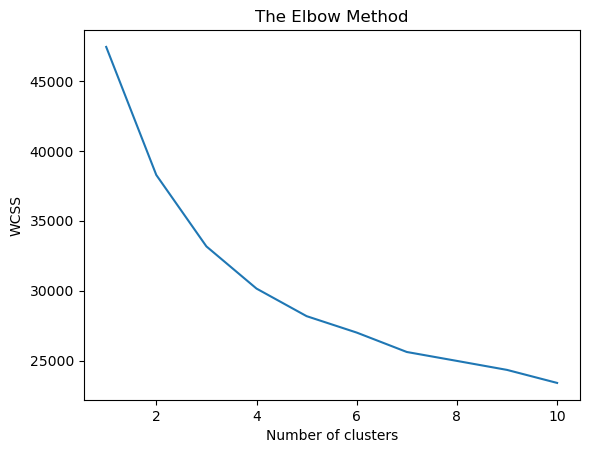

In [61]:
# Elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [62]:
# Initialise the model with K as 3
model5 = KMeans(n_clusters=2, random_state=15)

# Training the model
model5.fit(X_train)

KMeans(n_clusters=2, random_state=15)

In [63]:
y_pred_kmeans = model5.predict(X_test)

In [64]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_kmeans)
conf_matrix = confusion_matrix(y_test, y_pred_kmeans)
class_report = classification_report(y_test, y_pred_kmeans)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.44

Confusion Matrix:

[[2853 4431]
 [ 147  804]]

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.39      0.55      7284
           1       0.15      0.85      0.26       951

    accuracy                           0.44      8235
   macro avg       0.55      0.62      0.41      8235
weighted avg       0.86      0.44      0.52      8235



# KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) #it calculates the proportion of misclassified samples in the test set.

In [67]:
error_rate

[0.15713418336369156,
 0.11475409836065574,
 0.1193685488767456,
 0.1095324833029751,
 0.11050394656952034,
 0.10722525804493017,
 0.1095324833029751,
 0.10649666059502125,
 0.1079538554948391,
 0.1079538554948391]

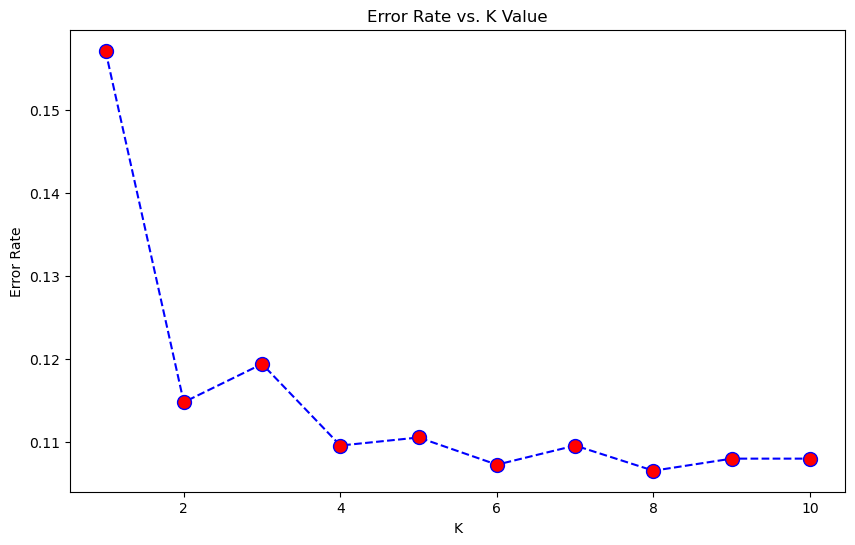

In [68]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [69]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,11):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train,y_train)
    Y_pred = knn2.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, Y_pred))

In [70]:
acc

[0.8428658166363084,
 0.8852459016393442,
 0.8806314511232544,
 0.8904675166970248,
 0.8894960534304797,
 0.8927747419550698,
 0.8904675166970248,
 0.8935033394049787,
 0.892046144505161,
 0.892046144505161]

Maximum accuracy: 0.8935033394049787 at K = 7


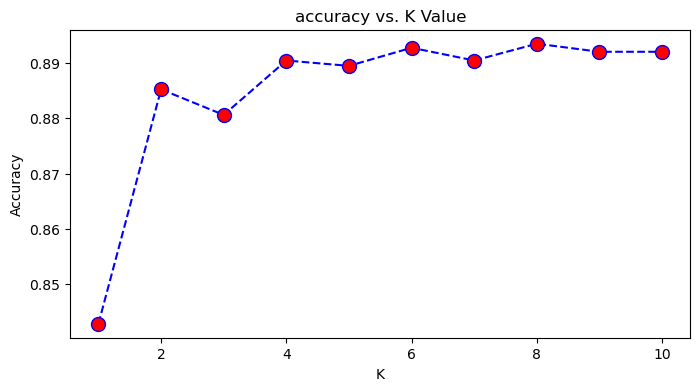

In [71]:
plt.figure(figsize=(8,4))
plt.plot(range(1,11),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:", max(acc), "at K =", acc.index(max(acc)))

In [72]:
knn1 = KNeighborsClassifier(n_neighbors=7)
knn1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [73]:
y_pred_knn = knn.predict(X_test)

In [74]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.89

Confusion Matrix:

[[7165  119]
 [ 770  181]]

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7284
           1       0.60      0.19      0.29       951

    accuracy                           0.89      8235
   macro avg       0.75      0.59      0.62      8235
weighted avg       0.87      0.89      0.87      8235



# Decision Tree

In [75]:
# Initialise the model objective
dt = DecisionTreeClassifier()

# Fit the model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [76]:
# Predict the output for test dataset
y_pred_tree = dt.predict(X_test)

In [77]:
accuracy = accuracy_score(y_test, y_pred_tree)
conf_matrix = confusion_matrix(y_test, y_pred_tree)
class_report = classification_report(y_test, y_pred_tree)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.84

Confusion Matrix:

[[6583  701]
 [ 643  308]]

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7284
           1       0.31      0.32      0.31       951

    accuracy                           0.84      8235
   macro avg       0.61      0.61      0.61      8235
weighted avg       0.84      0.84      0.84      8235



In [78]:
%%time
# Print time taken to execute this cell

# Dictionary of parameter to try and test for decision tree 
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4, 5, 6, 7],     
    "min_samples_leaf":list(range(1, 10))
    
}


tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, 
                       scoring="accuracy",           # Evaluation metric to evaluate the model
                       n_jobs=-1,                    # Numbers of cores used to execute this code
                       verbose=1, cv=3)

# Fit the model with each parameters
tree_cv.fit(X_train, y_train)

# It will print Best Parameters
best_params = tree_cv.best_params_ 
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4104 candidates, totalling 12312 fits
Best paramters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'best'})
CPU times: total: 30 s
Wall time: 2min 22s


In [79]:
# Passing best parameter to decision tree
dt1 = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf= 6, min_samples_split=2, splitter='best')

# Training model with best parameter
dt1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [80]:
# Predicton using Decision Tree
y_pred_hyper_decision = dt1.predict(X_test)

In [81]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_hyper_decision)
conf_matrix = confusion_matrix(y_test, y_pred_hyper_decision)
class_report = classification_report(y_test, y_pred_hyper_decision)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.90

Confusion Matrix:

[[7197   87]
 [ 763  188]]

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7284
           1       0.68      0.20      0.31       951

    accuracy                           0.90      8235
   macro avg       0.79      0.59      0.63      8235
weighted avg       0.88      0.90      0.87      8235



# RandomForest Algorithm

In [82]:
# Object creation, taking 200 decision tree in random forest 
rf_clf = RandomForestClassifier(n_estimators=200) 

# Training model
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [83]:
# Prediction using Random Forest Algorithm
y_pred_forest = rf_clf.predict(X_test)

In [84]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_forest)
conf_matrix = confusion_matrix(y_test, y_pred_forest)
class_report = classification_report(y_test, y_pred_forest)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.89

Confusion Matrix:

[[7052  232]
 [ 680  271]]

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7284
           1       0.54      0.28      0.37       951

    accuracy                           0.89      8235
   macro avg       0.73      0.63      0.66      8235
weighted avg       0.87      0.89      0.87      8235



In [85]:
%%time
# Time taken to execute this cell

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'random_state': [42]
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

Best Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42}
Best Accuracy: 90.15%
CPU times: total: 16.8 s
Wall time: 26min 41s


In [86]:
rf_clf2 = RandomForestClassifier(bootstrap = True, max_depth= 10, max_features= 'auto', min_samples_leaf=4, min_samples_split= 2, n_estimators=50, random_state= 42)
rf_clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf=4,
                       n_estimators=50, random_state=42)

In [87]:
y_pred_hyper_forest = rf_clf2.predict(X_test)

In [88]:
accuracy = accuracy_score(y_test, y_pred_hyper_forest)
conf_matrix = confusion_matrix(y_test, y_pred_hyper_forest)
class_report = classification_report(y_test, y_pred_hyper_forest)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.90

Confusion Matrix:

[[7185   99]
 [ 747  204]]

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7284
           1       0.67      0.21      0.33       951

    accuracy                           0.90      8235
   macro avg       0.79      0.60      0.63      8235
weighted avg       0.88      0.90      0.87      8235



# Detailed Report on Customer Data and Term Deposit Campaign

- **General Customer Profile:**

    - **Demographics:**
    
        **1. Age:** Varies between 17 and 98 years (wide range).
        
        **2. Marital Status:** Primarily married, followed by single and divorced.
       
        **3. Education:** Mostly university degree holders, followed by high school and basic education.
        
        **4. Occupation:** Mostly administrators, followed by blue-collar workers and technicians.
        
        **5. Housing:** Most customers have housing.
        
        **6. Loans:** Most customers do not have loans.
        
        **7. Phones:** Over 25,000 have cellular phones, around 15,000 have landlines.
      
      
    - **Campaign Contact:**
    
        1. Most contacts occurred in May, July, and August.
        2. Few contacts in September, March, and December.
        3. On average, clients contacted 3 times.
        4. Over 35,000 clients not contacted during previous campaign.
        5. Around 86% of clients not contacted before this campaign.


## Term Deposit Opt-in:
   **1. Age:** Most individuals who agreed are aged 23-45.
   
   **2. Occupation:** Similar to overall customer profile, administrators, blue-collar workers, and technicians dominate.
   **3. Marital Status:** Mostly married, with some divorced individuals (around 11%).
   **4. Education:** University degree holders most likely to opt-in (around 13%), followed by professional courses and high school.
   **5. Defaulters:** None opted for term deposit.
   **6. Loans:** Most term deposit opt-ins do not have loans.
   **7. Phones:** Cellular phone users slightly more likely to opt-in (around 14%).
   **8. Contact Frequency:** Increased number of calls correlates with lower opt-in percentage.
   **9. Early Contact:** Clients contacted in the first 15 days more likely to opt-in.
   **10. Previous Campaign Contact:** 91% of opt-ins not contacted during previous campaign.
   **11. Pre-Campaign Contact:** 86% of opt-ins not contacted before this campaign.


## Key Insights:
    1. The target audience for term deposit is primarily middle-aged, married, university-educated individuals with stable employment and housing.
    2. Targeting younger and first-time contacted clients could be beneficial.
    3. Optimizing contact frequency and focusing on the first 15 days of the campaign might increase opt-in rates.
    4. Reaching out to individuals not contacted in previous campaigns could be a valuable untapped market.


## Recommendations:
    1. Tailor marketing efforts to target the identified demographics and psychographics of term deposit opt-ins.
    2. Implement strategies to reach first-time contacted clients and those contacted early in the campaign.
    3. Analyze the relationship between contact frequency and opt-in rates to optimize future campaigns.
    4. Focus on reaching clients not contacted in previous campaigns to expand the potential customer base.

This report provides a comprehensive overview of the customer data and insights into the term deposit campaign. By leveraging these insights, you can refine your marketing strategies and improve the success of future campaigns.

| Algorithm	                   | Accuracy	  | Precision(Class 1)	  | Recall (Class 1)	| F1-Score (Class 1)
|------------------------------|--------------|-----------------------|----------------------|------------------|
Logistic Regression (Default Threshold)|	0.9	| 0.70	| 0.22	| 0.33
|------------------------------|--------------|-----------------------|----------------------|------------------|
Logistic Regression (SMOTE)	| 0.79	| 0.31	| 0.69	| 0.43
|------------------------------|--------------|-----------------------|----------------------|------------------|
KMeans	| 0.44	| 0.15 | 0.85	| 0.26
|------------------------------|--------------|-----------------------|----------------------|------------------|
KNN	| 0.89	| 0.60	| 0.19	| 0.29
|------------------------------|--------------|-----------------------|----------------------|------------------|
Random Forest (No Hypertuning)	| 0.89	| 0.54	| 0.28	| 0.37
|------------------------------|--------------|-----------------------|----------------------|------------------|
Random Forest (Hypertuned)	| 0.9	| 0.67	| 0.21	| 0.33
|------------------------------|--------------|-----------------------|----------------------|------------------|
Decision tree	| 0.9	| 0.68	| 0.20	| 0.31
|------------------------------|--------------|-----------------------|----------------------|------------------|

## DOMAIN ANALYSIS

In the context of direct phone call marketing campaigns for term deposits, the focus is often on reducing false positives or false negatives, depending on the specific business goals and constraints. Let's discuss these two types of errors:
    
1. **False Positives (Type I Error):**
   - Definition: A false positive occurs when the model predicts that a customer will subscribe to a term deposit, but in reality, the customer does not subscribe.
   - Impact: This type of error may lead to unnecessary costs and resources being allocated for marketing to customers who are unlikely to subscribe. It can also result in customer dissatisfaction if they receive irrelevant promotional materials.

2. **False Negatives (Type II Error):**
   - **Definition:** A false negative occurs when the model predicts that a customer will not subscribe to a term deposit, but in reality, the customer does subscribe.
   - **Impact:** This type of error can be more costly as the bank may miss opportunities to promote term deposits to customers who are actually interested. It may result in lost revenue and hinder the bank's ability to maximize the effectiveness of its marketing campaigns.

In the case of direct phone call marketing campaigns, striking a balance between these two types of errors is crucial. The trade-off between false positives and false negatives can be managed by adjusting the classification threshold of the model. 

## Choosing the best model for your specific scenario depends on your priorities and cost structure:
- **Prioritize accurately identifying actual subscriptions (higher precision):** Consider Logistic Regression or Random Forest, depending on cost implications of false positives.

<div style="text-align: center; font-family: 'Your Preferred Font', cursive; font-size: 40px; color: purple; max-width: 100%; margin: 0 auto;">Thank You</div>